In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

In [4]:
(train_data, train_targets),(test_data, test_targets) = (boston_housing.load_data())

57026/57026 [==============================] - 0s 0us/step


In [5]:
train_data.shape

(404, 13)

In [6]:
test_data.shape

(102, 13)

In [7]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [8]:
import numpy as np


In [9]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [10]:
train_data.min()

-3.8172503201932733

In [11]:
train_data.max()

9.234847178400438

In [12]:
from keras.utils.sidecar_evaluator import optimizer
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop",
                loss="mse",
                metrics=["mae"]
                )
  return model

In [25]:
from tensorflow.python.ops.array_ops import numbers
k = 4
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples ]
  partial_train_data = np.concatenate([train_data[: i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[: i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)
  model = build_model()
  model.fit(partial_train_data, 
            partial_train_targets,
            epochs=num_epochs,
            batch_size=16,
            verbose=0
            )
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)



Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [14]:
all_scores

[1.9807302951812744, 2.455702781677246, 2.4208383560180664, 2.404228687286377]

In [15]:
np.mean(all_scores)

2.315375030040741

In [30]:
k=4
num_epochs = 500
all_history_mae = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples ]
  partial_train_data = np.concatenate([train_data[: i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[: i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)
  model = build_model()
  history = model.fit(partial_train_data, 
            partial_train_targets,
            validation_data = (val_data, val_targets),
            epochs=num_epochs,
            batch_size=16,
            verbose=0
            )
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  mae_history = history.history["val_mae"]
  all_history_mae.append(mae_history)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [37]:
len(all_history_mae)

4

In [42]:
average_all_mae = [np.mean([x[i] for x in all_history_mae]) for i in range(num_epochs)]

In [48]:
print(average_all_mae)

[18.814010620117188, 15.116753578186035, 10.749727725982666, 7.262376546859741, 5.525530815124512, 4.562677621841431, 3.996072292327881, 3.6207411885261536, 3.41067373752594, 3.256449043750763, 3.176469624042511, 3.056013524532318, 3.0289050340652466, 2.9458165764808655, 2.8539721369743347, 2.8481550216674805, 2.7925246357917786, 2.8073781728744507, 2.66804701089859, 2.665538966655731, 2.620834469795227, 2.6494343876838684, 2.5808457732200623, 2.5755046606063843, 2.557596266269684, 2.521678626537323, 2.502557337284088, 2.5109198093414307, 2.482916831970215, 2.570630192756653, 2.496942698955536, 2.480615973472595, 2.50552099943161, 2.4609832167625427, 2.5253483653068542, 2.464116156101227, 2.438425987958908, 2.4330652952194214, 2.447962999343872, 2.3934502601623535, 2.440964460372925, 2.4114418625831604, 2.4473974108695984, 2.48107647895813, 2.394980013370514, 2.497674822807312, 2.450403332710266, 2.46791011095047, 2.425829589366913, 2.4201791882514954, 2.439946234226227, 2.403347730636

In [45]:
len(all_history_mae[0])

500

In [46]:
len(all_history_mae[1])

500

In [49]:
len(average_all_mae)

500

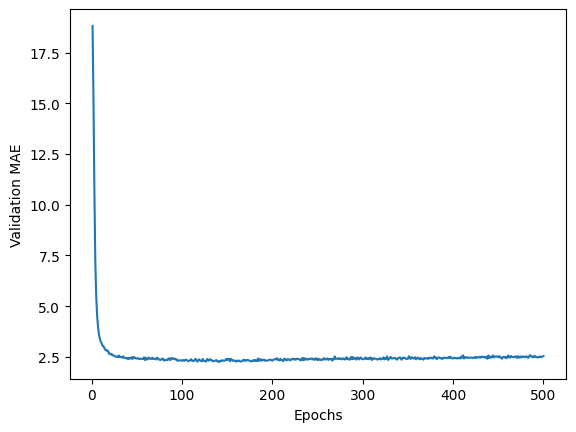

In [52]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_all_mae)+1), average_all_mae)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

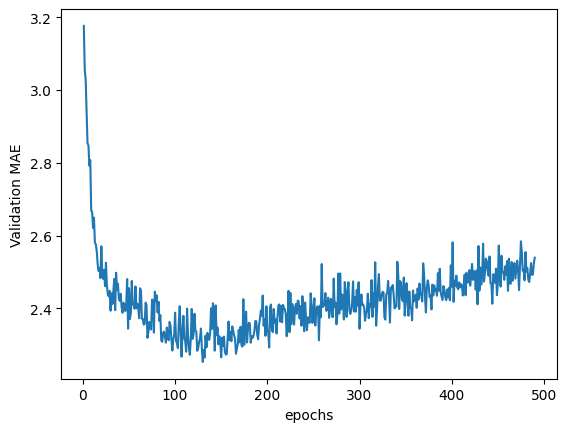

In [53]:
all_average_mae = average_all_mae[10:]
plt.plot(range(1, len(all_average_mae)+1), all_average_mae)
plt.xlabel("epochs")
plt.ylabel("Validation MAE")
plt.show()

In [54]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse, test_mae = model.evaluate(test_data, test_targets)


4/4 [==============================] - 0s 4ms/step - loss: 16.2594 - mae: 2.6703


In [55]:
test_mae

2.670275926589966

In [56]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([9.080494], dtype=float32)